# Esercizi: BLAS e NumPy

In [100]:
import numpy as np
import matplotlib.pyplot as plt

## Esercizio BLAS 1: verifichiamo che le colonne di una matrice nxn a valori casuali sono vettori di R^n a due a due poco allineati tra di loro

Hint:
- definisco n = ... (valore a scelta)
- costruisco una matrice M di dimensioni nxn a valori casuali con "M = np.random.rand(n,n)"
- calcolo il coseno tra ogni coppia di colonne con la formula. Ricordiamo che c'è un legame preciso tra il prodotto interno $x^T y$ di due vettori (colonna) $x$ e $y$ e l'angolo $\alpha$ tra gli stessi: 
\begin{equation}
\cos \alpha = \frac{x^T y}{\| x \| \| y \|}  \qquad .
\end{equation}
- faccio il grafico dei coseni, ovvero un grafico tri-dimensionale di n^2 punti (nuvola di punti), che risultano distribuiti mediamente su un piano di altezza lontana da zero e da 1.0

Commento: questo tipo di verifica viene comunemente fatta in modo più forte, verificando che nessuna colonna di M sia combinazione lineare delle altre, ovvero calcolando il rango per colonne della matrice, effettuato mediante il calcolo della Singular Value Decomposition o SVD (il numero di valori singolari strettamente >0 è pari al rango della matrice). Sarà oggetto di una lezione successiva.

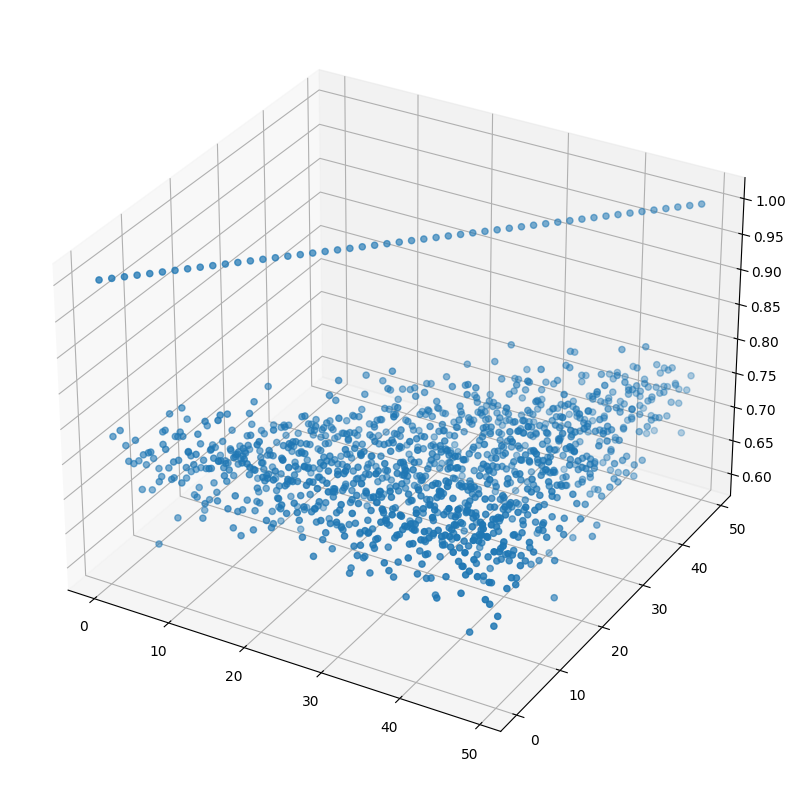

In [101]:
# initializzo le variabili
n = 50
M = np.random.rand(n,n)
# possiamo ottimizzare il procedimento non calcolando due volte l'angolo fra una
# colonna i e una j, prendendo la coppia (i,j) ma non (j,i)
# quindi avremo un numero totale di punti:
tot = int(n*(n+1)/2)
P = np.zeros((3,tot))


# calcoliamo il coseno tra le colonne
count = 0
for i in range(n):
    # potremmo non prendere i e usare range(i+1,n) poichè una colonna è 
    # ovviamente allineata con se stessa, ma lo aggiungiamo per controllare 
    # l'effettiva distanza dei risultati da 1 (caso "vettori paralleli") 
    for j in range(i,n):
        v = M[:,i]
        w = M[:,j]
        scal = v.dot(w)
        norm_prod = np.linalg.norm(v)*np.linalg.norm(w)
        cos = scal/norm_prod

        P[0,count] = j
        P[1,count] = i
        P[2,count] = cos
        count +=1


# rappresento i risultati
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(P[0,:],P[1,:],P[2,:])
plt.show()

## Esercizio BLAS 2: 

Hint:
- consideriamo ad esempio la funzione prodotto di due coseni $f(x,y) = cos(x)\ *\ cos(y)$
- e vogliamo calcolarla in una griglia cartesiana di punti nell'intervallo  $[0, pi] \times [0, pi]$
- definiamo due vettori di coordinate 1-dimensionali "x = np.linspace(0.0, np.pi, num=100, endpoint=True)" ed "y = ..."
- calcoliamo il coseno di entrambi i vettori e ne facciamo il prodotto esterno.
- per veder il risultato possiamo graficare i punti calcolati come superficie in $R^3$.

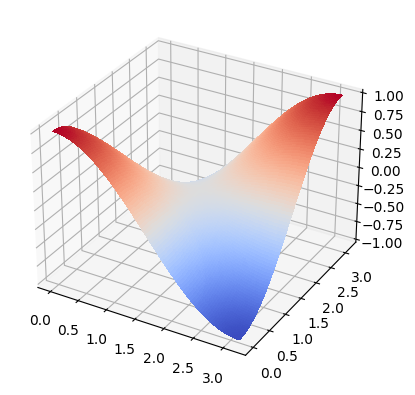

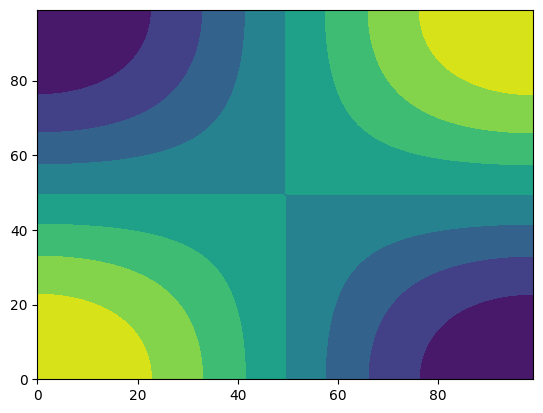

In [102]:
x = np.linspace(0.0, np.pi, num=100, endpoint=True)
y = x

X,Y = np.meshgrid(x,y)

# calcolo il coseno (per ogni entrata) dei vettori 
v = np.atleast_2d(np.cos(x)).T     
w = np.atleast_2d(np.cos(y)) 
pr_est = v @ w   

# Rappresentazione
fig = plt.figure(2)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X, Y, pr_est, rstride=1, cstride=1, linewidth=0, cmap=plt.cm.coolwarm, antialiased=False)

# A colori:
plt.figure(3); 
plt.contourf(pr_est)

plt.show()

### b) Verificare che con il prodotto esterno di due vettori è possibile calcolare il prodotto di due polinomi univariati in una griglia di punti

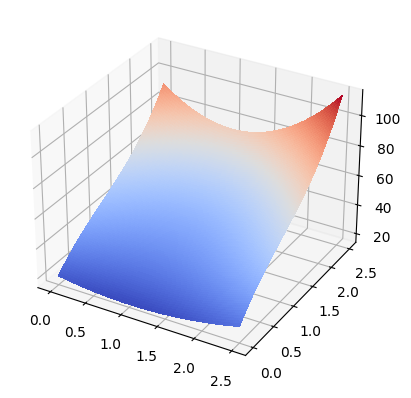

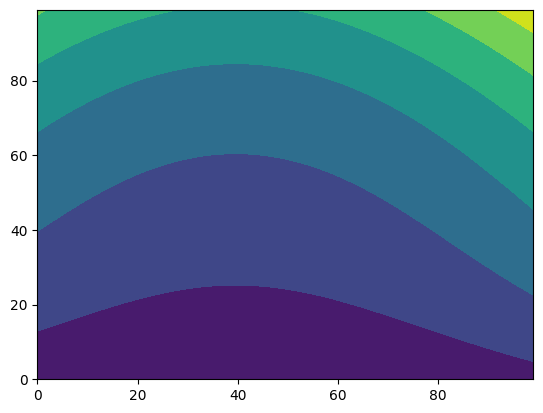

In [103]:
x = np.linspace(0.0, 2.5, num=100, endpoint=True)
y = x

X,Y = np.meshgrid(x,y)

# parametri e calcolo polinomi
a1,b1,c1,d1 = 1,-3,7,4
v = a1*x**3 + b1*x**2 + c1*x + d1*np.ones(100)

a2,b2,c2,d2 = 0,1,-2,5  # in realtà è di secondo grado
w = a2*x**3 + b2*x**2 + c2*x + d2*np.ones(100)

# calcolo il coseno (per ogni entrata) dei vettori 
v = np.atleast_2d(v).T     
w = np.atleast_2d(w) 
pr_est = v @ w   

# Rappresentazione
fig = plt.figure(2)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X, Y, pr_est, rstride=1, cstride=1, linewidth=0, cmap=plt.cm.coolwarm, antialiased=False)

# A colori:
plt.figure(3); 
plt.contourf(pr_est)

plt.show()

## Esercizio BLAS 3: verificare che se prendiamo una matrice a valori pseudo-casuali e la moltiplichiamo per se stessa un numero crescente di volte, scelte a caso due colonne della matrice risultante, esse risultano sempre più allineate

Hint: possiamo estendere il primo esercizio, inserendolo in un ciclo for all'interno del quale, ad ogni iterazione, moltiplichiamo la matrice $M$ per se stessa. Dobbiamo ottenere una nuvola di punti che si avvicina progressivamente a 1. 

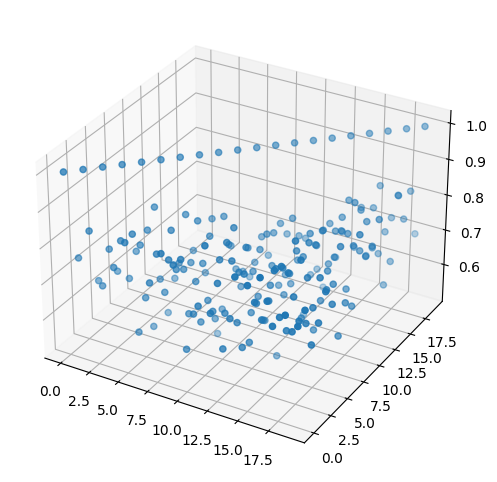

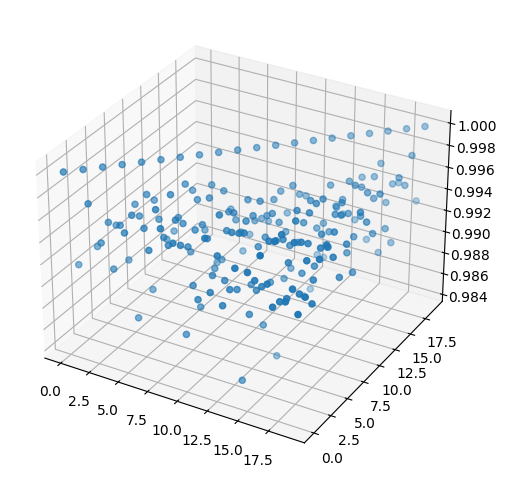

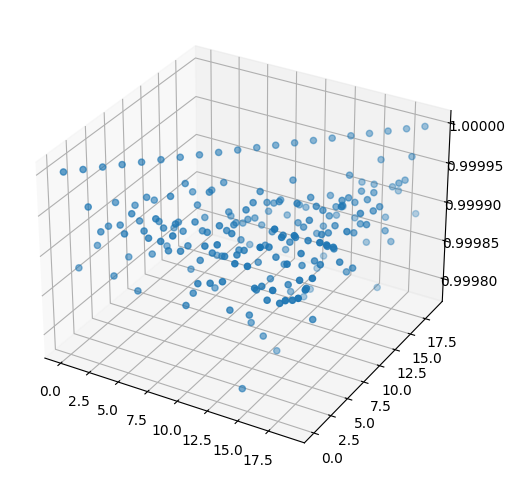

In [104]:
# initializzo le variabili
m = 3  # volte in cui vogliamo moltiplicare M
n = 20
M = np.random.rand(n,n)
tmp = M
# possiamo ottimizzare il procedimento non calcolando due volte l'angolo fra una
# colonna i e una j, prendendo la coppia (i,j) ma non (j,i)
# quindi avremo un numero totale di punti:
tot = int(n*(n+1)/2)
P = np.zeros((3,tot))

for k in range(m):
    if k > 0:
        M = M @ tmp
    # calcoliamo il coseno tra le colonne
    count = 0
    for i in range(n):
        # potremmo non prendere i e usare range(i+1,n) poichè una colonna è 
        # ovviamente allineata con se stessa, ma lo aggiungiamo per controllare 
        # l'effettiva distanza dei risultati da 1 (caso "vettori paralleli") 
        for j in range(i,n):
            v = M[:,i]
            w = M[:,j]
            scal = v.dot(w)
            norm_prod = np.linalg.norm(v)*np.linalg.norm(w)
            cos = scal/norm_prod

            P[0,count] = j
            P[1,count] = i
            P[2,count] = cos
            count +=1

    # rappresento i risultati
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111,projection='3d')
    ax.scatter(P[0,:],P[1,:],P[2,:])
    plt.show()

Si nota dai valori sull'asse z che tutti i risultati sono vicini a 1: nell'ultima iterazione i risultati $\in [0.99975,1]$